### Ecommerce Text Classification

***

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'ecommerceDataset.csv'

In [25]:
df = pd.read_csv('ecommerceDataset.csv', header = None)

In [27]:
df = df.sample(frac = 1)

In [28]:
df.reset_index(drop = True, inplace = True)

In [29]:
df = df[0:1000]

In [30]:
df.head()

,0,1
0,Household,Saisan Decorative Push Pins Multiple Compartme...
1,Books,Human Resource Management [Choice Based Credit...
2,Household,ALTON Leo 12195 Brass Single Lever Kitchen Sin...
3,Household,SAI high Grade Mailbox An excellent letter box...
4,Books,The Art Of War


### Check info

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Check for missing values

In [32]:
df.isna().sum()

0    0
1    0
dtype: int64

### Drop missing rows

In [33]:
df.dropna(inplace = True)

### Print some of the text along with its Label

In [34]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- Saisan Decorative Push Pins Multiple Compartment Different Projects Reusable Organizing Container Storage Box By Office & Home (50 Pieces) Brand : SAISAN Color : Light Green Description :   - Office+Style Colored Push Pins add life to any office or home bulletin board. The bright colored push pins make them more noticeable and less boring than standard ones. They come in a convenient six compartment plastic transparent container with a re-closable lid for easy storage. The push pins are made from durable plastic and stainless steel with sharp tips.

Books -- Human Resource Management [Choice Based Credit System (CBCS)] (June 2016 Edition) [Choice Based Credit System (CBCS)]

Household -- ALTON Leo 12195 Brass Single Lever Kitchen Sink Mixer with 360 Swivel Spout and Flexible Silicone Spout, Sink Taps (Black)

Household -- SAI high Grade Mailbox An excellent letter box. It has strong, sturdy lock. High grade iron material body will keep your mail safe and secure. Long last 

### Create a function to preprocess the text

In [18]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [35]:
df[1] = df[1].apply(preprocess)

### Print some of the texts after the applying the function

In [36]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- saisan decorative push pin multiple compartment different project reusable organizing container storage box by office home 50 piece brand saisan color light green description office style colored push pin add life to any office or home bulletin board the bright colored push pin make them more noticeable and le boring than standard one they come in a convenient six compartment plastic transparent container with a re closable lid for easy storage the push pin are made from durable plastic and stainless steel with sharp tip

Books -- human resource management choice based credit system cbc june 2016 edition choice based credit system cbc

Household -- alton leo 12195 brass single lever kitchen sink mixer with 360 swivel spout and flexible silicone spout sink tap black

Household -- sai high grade mailbox an excellent letter box it ha strong sturdy lock high grade iron material body will keep your mail safe and secure long last powder coating and nice red color enhance your ex

### Check for imbalance in the dataset

<AxesSubplot:ylabel='0'>

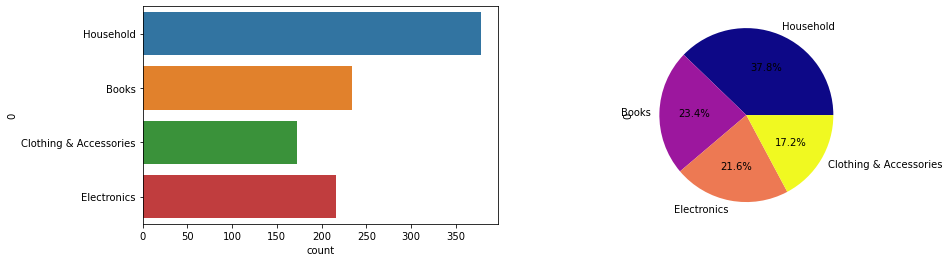

In [45]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df[0])
plt.subplot(1,2,2)
df[0].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

### Split the dataset into Input & Target Variables

In [46]:
X = df[1]

In [47]:
y = df[0]

### Label Encode our Target Variables

In [49]:
y = y.map({'Household':0,'Books':1, 'Clothing & Accessories':2, 'Electronics':3})

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [51]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

X = text_encoding(X)

### Split the dataset into Training & Testing set

In [52]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential model with Bidirectional LSTM layers

In [57]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation = 'sigmoid'))

### Compile the model

In [58]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [59]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 29s 671ms/step - loss: 1.2922 - accuracy: 0.4250 - val_loss: 1.3520 - val_accuracy: 0.3500
Epoch 2/10
24/24 [==============================] - 12s 517ms/step - loss: 0.9028 - accuracy: 0.6026 - val_loss: 1.0638 - val_accuracy: 0.5250
Epoch 3/10
24/24 [==============================] - 12s 513ms/step - loss: 0.4314 - accuracy: 0.8461 - val_loss: 0.8646 - val_accuracy: 0.7000
Epoch 4/10
24/24 [==============================] - 12s 496ms/step - loss: 0.2523 - accuracy: 0.9368 - val_loss: 0.4955 - val_accuracy: 0.8000
Epoch 5/10
24/24 [==============================] - 12s 498ms/step - loss: 0.0936 - accuracy: 0.9816 - val_loss: 0.5008 - val_accuracy: 0.8500
Epoch 6/10
24/24 [==============================] - 13s 537ms/step - loss: 0.0194 - accuracy: 0.9974 - val_loss: 0.4887 - val_accuracy: 0.8250
Epoch 7/10
24/24 [==============================] - 16s 654ms/step - loss: 0.0362 - accuracy: 0.9947 - val_loss: 0.5077 - val_accuracy: 0.8250

### Make predictions with X_test

In [60]:
y_pred = model.predict(X_test)

7/7 [==============================] - 8s 175ms/step


### Fetch the index of the higher probable prediction

In [61]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [62]:
accuracy_score(y_test,y_pred)

0.87

### Confusion matrix

<AxesSubplot:>

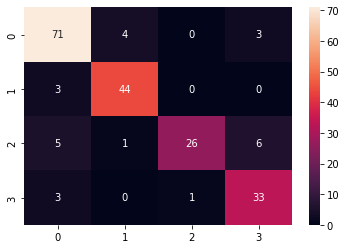

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.90      0.94      0.92        47
           2       0.96      0.68      0.80        38
           3       0.79      0.89      0.84        37

    accuracy                           0.87       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.88      0.87      0.87       200



***